<a id='intro'></a>
## Introduction

In this project, we'll be analyzing data collected from medical appointments in Brazil. The project is specifically focused on exploring the association between the characteristics of the patients/appointments and whether or not the patients showed up to their appointments.
Some of the questions that the analysis will attempt to explore are:
- Are males or females more likely to show up for their appointment?
- How does the patients' age affect the probability of them showing up?
- Are patients more likely to show up at certain neighbourhoods?
- Does having a scholarship(enrollment Brasilian welfare program) increase the probability of showing up?
- Are patients with special conditions(such as Diabetes or Handicaps) more or less likely to showup?
- Does receiving an SMS to confirm the appointment increase the probability of patients showing up?

In [2]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, we will load the dataset into a pandas dataframe, then we will inspect the data to gain an overview of the data and its type. In the next sub-section, we will look to clean the data and prepare it for our analysis

### General Properties

In [7]:
#Load and inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()
df.isnull().value_counts()

PatientId  AppointmentID  Gender  ScheduledDay  AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show
False      False          False   False         False           False  False          False        False         False     False       False    False         False      110527
dtype: int64

In [4]:
#Check the dataset dimensions
df.shape

(110527, 14)

In [7]:
#Check for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- 110527 row and 13 columns in this dataset.
- No missing values.
- Hypertension and Handicap are misspelled.
- Column names format is not consistent

Most of the data types are fine except for ScheduledDay and AppointmentDay which should be changed to date_time format. However, after further inspection from the Kaggel source, some users mentioned that a large number of the appointment dates are before the scheduled dates, so it does not make sense to consider these columns in our analysis. We will check this information later ourselves to confirm

Let's look at some characteristics for our data

In [32]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- Mean age is 37.
- Max age is 115.
- Min age is -1, which does not make sense. We will handle this in our Data Cleaning section.
- About 20% of patients suffer from Hypertension.
- 7% of patients suffer from Diabetes.
- 3% of patients suffer from Alcoholism.
- 9.8% of patients have scholarships.
- 32% of patients received an SMS.

Next, we will check the relevant columns for consistency and figure out the possible values for each column

In [8]:
#Check the column values for consistency
print(df.Gender.value_counts())
print(df.Scholarship.value_counts())
print(df.Hipertension.value_counts())
print(df.Diabetes.value_counts())
print(df.Alcoholism.value_counts())
print(df.Handcap.value_counts())
print(df.SMS_received.value_counts())
print(df['No-show'].value_counts())

F    71840
M    38687
Name: Gender, dtype: int64
0    99666
1    10861
Name: Scholarship, dtype: int64
0    88726
1    21801
Name: Hipertension, dtype: int64
0    102584
1      7943
Name: Diabetes, dtype: int64
0    107167
1      3360
Name: Alcoholism, dtype: int64
0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64
0    75045
1    35482
Name: SMS_received, dtype: int64
No     88208
Yes    22319
Name: No-show, dtype: int64


- Gender Values in the dataset are M or F
- Scholarship, Hypertension, Diabetes and SMS_received values are boolean (0 or 1)
- Handicap values are from 0 to 4. According to the dataset source from Kaggel, this represents the number of handicaps a person suffers from.
- No-show values are Yes or No

Let's check if there are any duplicate rows

In [9]:
#Check for duplicates
df.duplicated().value_counts()

False    110527
dtype: int64

No duplicates found

Finally, we will check the dates issues. But we need to change their data type to date time in order to compare them.

In [10]:
#Change columns data types to date time
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

#Check the new data type to confirm
(df.ScheduledDay.dtype, df.AppointmentDay.dtype)

(datetime64[ns, UTC], datetime64[ns, UTC])

In [13]:
#Compare the values of ScheduledDay and AppointmentDay
(df.ScheduledDay >  df.AppointmentDay).value_counts()

False    71959
True     38568
dtype: int64

As we suspected, the appointment day is not always ahead of the scheduled day. We will avoid using these columns in our analysis since they might be incorrect.

### Issues
- PatientId and AppointmentID will be dropped since they are not required for the analysis
- ScheduledDay and AppointmentDay will be dropped as they might be incorrect.
- Correct Hypertension and Handicap spelling.
- Format the column names to snake_case.
- Handle the -1 Age values.

### Data Cleaning 
In this section, we will handle the issues mentioned above to start analyzing our data.

First, We will drop the columns that we will not use.

In [14]:
#Drop the PatientId, AppointmentID, ScheduledDay, AppointmentDay columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [15]:
#Check the data after editing
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Second, we will correct the spelling for Hypertension and Handicap, as well as changing no-show to snake case.

In [19]:
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'no-show': 'no_show'}, inplace=True)

Third, let's format all the column name to lower case

In [17]:
#Set all column labels to lowercase
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [20]:
#Check the data after editing
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Finally, we will handle the -1 Age values.

In [21]:
#Check the columns with -1 age values
df.query("age == -1")

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


There is only one value. Let's drop it to avoid any possible issues.

In [22]:
df.drop(df.query("age == -1").index, inplace = True)

In [23]:
#Check if the operation was successful
df.query("age == -1")

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


Let's take a final look at the data to make sure all the data types are correct and the data set is ready for exploration.

In [24]:
df.shape

(110526, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   gender         110526 non-null  object
 1   age            110526 non-null  int64 
 2   neighbourhood  110526 non-null  object
 3   scholarship    110526 non-null  int64 
 4   hypertension   110526 non-null  int64 
 5   diabetes       110526 non-null  int64 
 6   alcoholism     110526 non-null  int64 
 7   handicap       110526 non-null  int64 
 8   sms_received   110526 non-null  int64 
 9   no_show        110526 non-null  object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


Seems like our data is clean and we can move on to the Exploratory Data Analysis!

<a id='eda'></a>
## Exploratory Data Analysis

In this section, we will compute statistics and create visualizations to help answer our research questions that were posed in the Introduction section. But first, let's take a quick look for some visuals to help us unsertand the data more.

Since we're analyzing the appoinmets no-shows, let's create a pie chart to compare between the shows and no-shows percentages. 

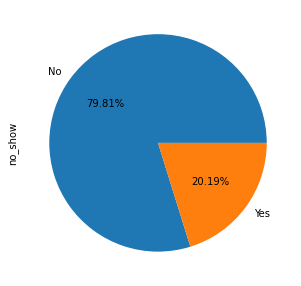

In [34]:
#create a pie chart for the shows and no_shows
df.no_show.value_counts().plot.pie(y = 'No Shows', figsize = (5, 5), autopct = '%.2f%%');

- About 20% of patients did not show for their appointment.

Let's take a look at histograms for the entire dataset.

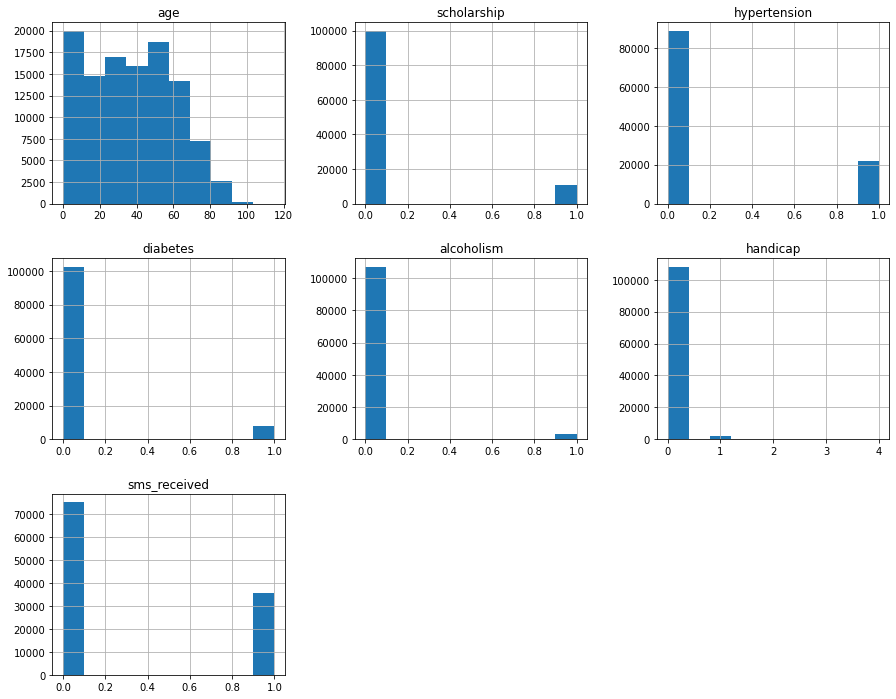

In [30]:
df.hist(figsize = (15, 12));

- The age histogram is a little right skewed which makes sense as ages values above 90 are included.
- The age frequency is especially higher for ages 0-10, 20-30 and 45-60.
- Other columns follow our initial inpection.

Since our analysis will primarly focus on comparing the shows and no_shows values, let's create a function for plotting them on bar charts to make our code more effecient.

In [64]:
"""
Description: Plots 2 overlaying bar charts for shows and no_shows, each with 2 bars representing 2 conditions
(e.g gender=male, gender=female)
Inputs:
- Data frame
- Condition 1 in string format for query
- Condition 2 in string format for query
- An array of 2 strings for bar labels
- Xlabel
- Ylabel
- title
"""
def plot_bar(df, condition1_str,condition2_str, labels, xlabel, ylabel, title):
    df_show = df.query("no_show == 'No'")
    df_no_show = df.query("no_show == 'Yes'")
    plt.figure(figsize = (8, 8));
    plt.bar(labels, [df_show.query(condition1_str).shape[0], df_show.query(condition2_str).shape[0]], alpha = 0.7);
    plt.bar(labels, [df_no_show.query(condition1_str).shape[0], df_no_show.query(condition2_str).shape[0]], alpha=0.7);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);
    plt.legend(['Shows', 'No Shows']);
    plt.show();
    

Now, we will try to answer our Research Questions by finding correlations between our dependent variable (no_shows) and other independent variables.

### Research Question 1: Are males or females more likely to show up for their appointment?

Let's take a look at the numbers

In [69]:
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [68]:
df.groupby('no_show').gender.value_counts()

no_show  gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: gender, dtype: int64

The number of females is higher than males by about 30 thousand. Let's plot the result using our function

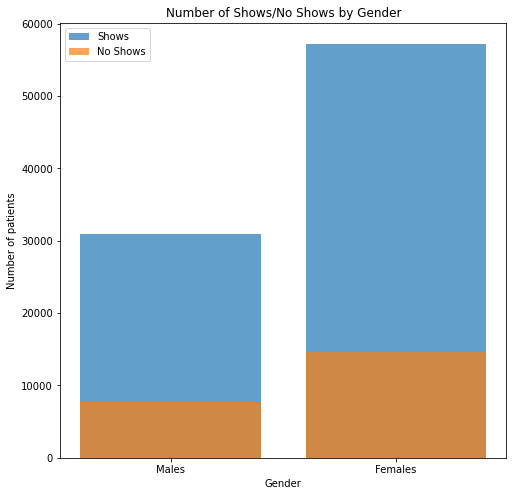

In [65]:
plot_bar(df, "gender == 'M'", "gender == 'F'", ['Males', 'Females'], 'Gender', 'Number of patients', 'Number of Shows/No Shows by Gender')

There doesn't seem to be a clear corroletion. Let's look at the proportions to make sure.

In [74]:
males = df.query("gender == 'M'").shape[0]
females= df.query("gender == 'F'").shape[0]
males_no_show = df_no_show.query("gender == 'M'").shape[0]
females_no_show = df_no_show.query("gender == 'F'").shape[0]

In [73]:
print("Ration of no_shows/total")
print(f"Ratio of males: {males_no_show/males}")
print(f"Ratio of females: {females_no_show/females}")

Ration of no_shows/total
Ratio of males: 0.19967947889471915
Ratio of females: 0.20314870752655242


Conclusion: Gender is insignificent

### Research Question 2:  How does the patients' age affect the probability of them showing up?

We will visualize the difference in age distribution using a histogram

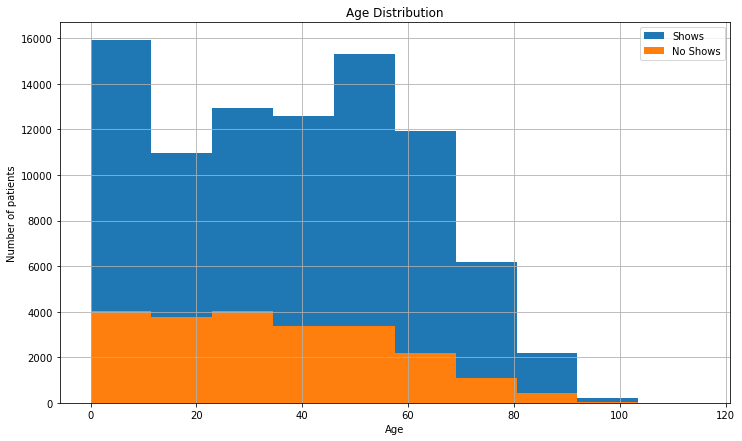

In [89]:
#Create a histogram for the age of the entire df
df_show.age.hist(figsize = (12, 7))
#Create a histogram for the age of the noshows 
df_no_show.age.hist();
plt.title('Age Distribution');
plt.xlabel('Age');
plt.ylabel('Number of patients');
plt.legend(['Shows', 'No Shows']);

Notice that the number of patients who kept their appointment to those who didn't is relatively higher form ages 0-10 and around 45-58.
Let's look at the mean age for the shows and no shows

In [88]:
print("Mean age for Shows:", df_show.age.mean())
print("Mean age for No Shows: ", df_no_show.age.mean())

Mean age for Shows: 37.790504154999034
Mean age for No Shows:  34.31766656212196


The mean age for the shows is higher by about 3 years.

Conclusion: Age slightly affects the probability of showing, especially ages from 0-10 and 40-60 as they are more likely to show. However more advanced anaylsis needs to be done to confirm if there's any correlations

### Research Question 3: Are patients more likely to show up at certain neighbourhoods?

We can start by calculating how many neighbourhoods there are.

In [225]:
df.neighbourhood.nunique()

81

Next, we will plot a bar chart for the shows/no_shows by neighborhood.

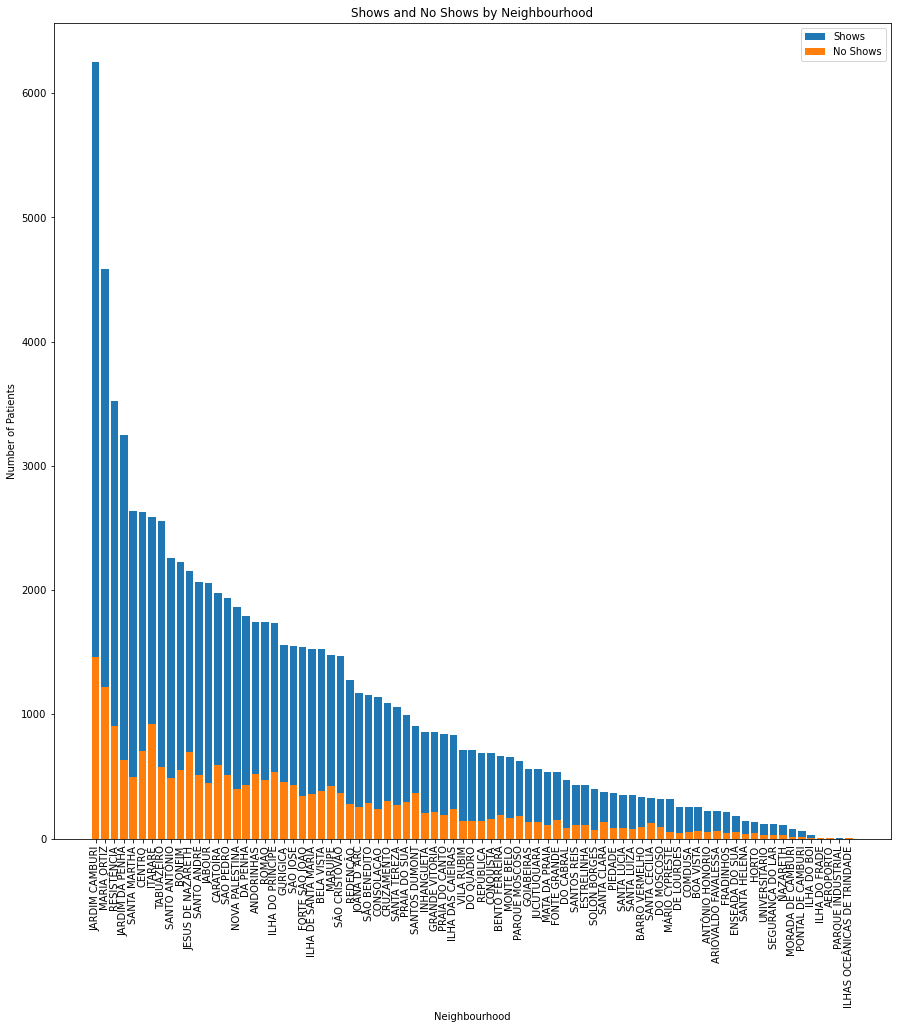

In [135]:
plt.figure(figsize = [15, 15]);
plt.bar(df_show.neighbourhood.value_counts().index, df_show.neighbourhood.value_counts());
plt.bar(df_no_show.neighbourhood.value_counts().index, df_no_show.neighbourhood.value_counts());
plt.xticks(rotation='vertical')
plt.title('Shows and No Shows by Neighbourhood');
plt.xlabel('Neighbourhood');
plt.ylabel('Number of Patients');
plt.legend(['Shows', 'No Shows']);


It appears that certain neighbourhoods have a highe probability of patients showing to their appointment. Let's take a look at the proportions.

In [175]:
#Make sure indexes are the same
neigh_no_show = df_no_show.neighbourhood.value_counts()
neigh_show= df_show.neighbourhood.value_counts().reindex(x.index)
neigh_no_show.index == neigh_show.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

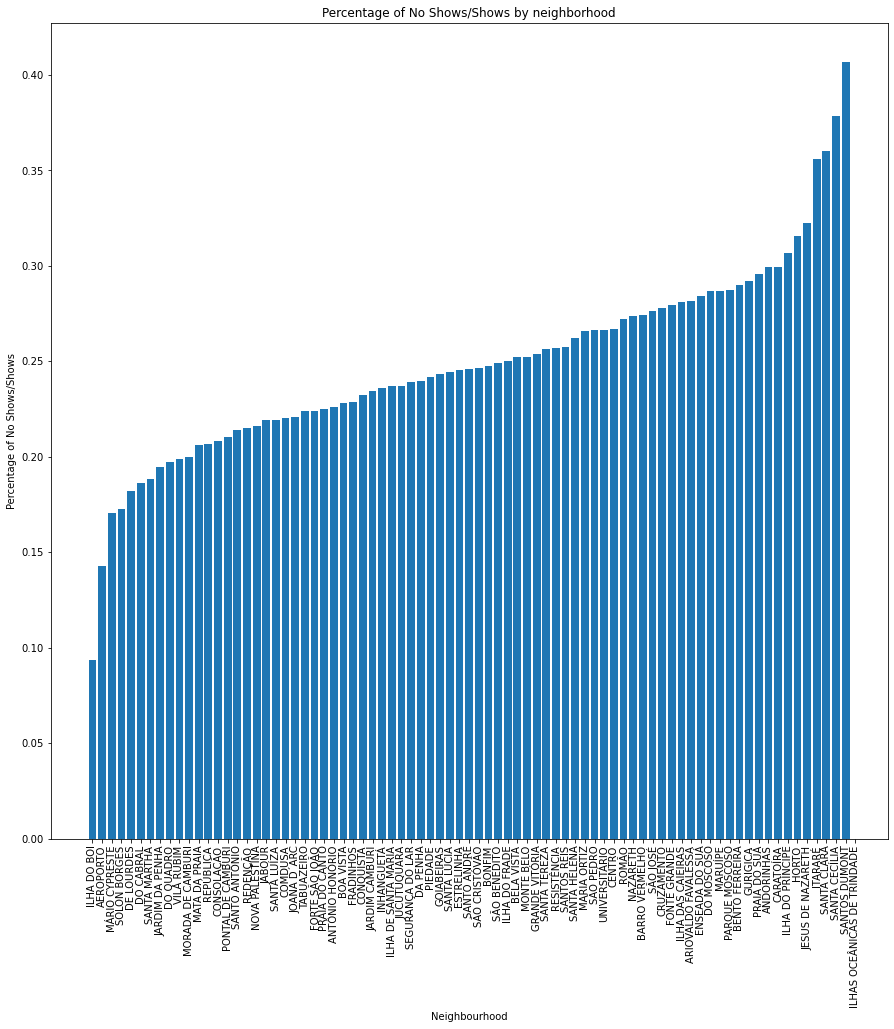

In [177]:
#Plot bar chart showing proportions
neigh_prop = (neigh_no_show / neigh_show).sort_values()
plt.figure(figsize = [15, 15]);
plt.bar(neigh_prop.index, neigh_prop);
plt.xticks(rotation='vertical')
plt.title('Percentage of No Shows/Shows by neighborhood');
plt.xlabel('Neighbourhood');
plt.ylabel('Percentage of No Shows/Shows');


Things are way more clear now, neighborhood clearly affects the probability of showing

### Research Question  4: Does having a scholarship(enrollment Brasilian welfare program) increase the probability of showing up?

We will plot a pie chart to show the proportions of patients having scholarships

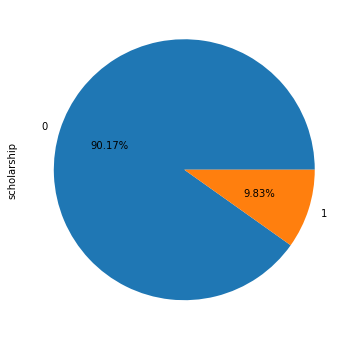

In [178]:
df.scholarship.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%');

About 9.83% of patients have a scholarship. Now let's plot a bar chart using our function.

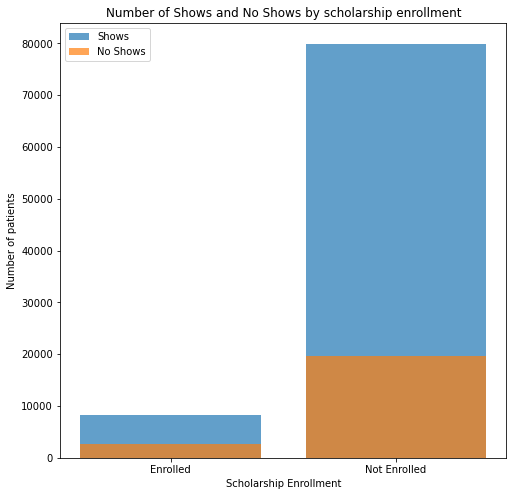

In [179]:
plot_bar(df, "scholarship == 1", "scholarship == 0", ['Enrolled', 'Not Enrolled'], 'Scholarship Enrollment', 'Number of patients'
        , 'Number of Shows and No Shows by scholarship enrollment')

Visually, the proportions look similar, but let's calculate them to make sure

In [180]:
enrolled_prop = df_no_show.query("scholarship == 1").shape[0] / df.query("scholarship == 1").shape[0]
not_enrolled_prop = df_no_show.query("scholarship == 0").shape[0] / df.query("scholarship == 0").shape[0]

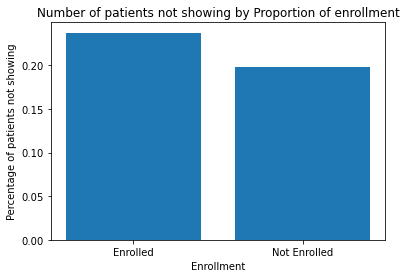

In [190]:
plt.bar(['Enrolled', 'Not Enrolled'], [enrolled_prop, not_enrolled_prop]);
plt.title('Number of patients not showing by Proportion of enrollment');
plt.xlabel('Enrollment');
plt.ylabel('Percentage of patients not showing');

In [188]:
print(f"Patients enrolled in a scholarship are more likely to not show by about:{(enrolled_prop - not_enrolled_prop)*100}%")

Patients enrolled in a scholarship are more likely to not show by about:3.9289495696782555%


### Research Question 5: Does receiving an SMS to confirm the appointment increase the probability of patients showing up?

Let's take a look at the proportions of receving an SMS

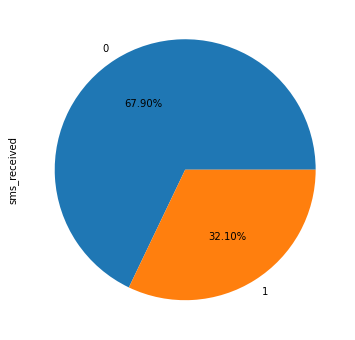

In [191]:
df.sms_received.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%');

About 32% of patients received an SMS. Now let's look at a bar chart for thes shows and noshows.

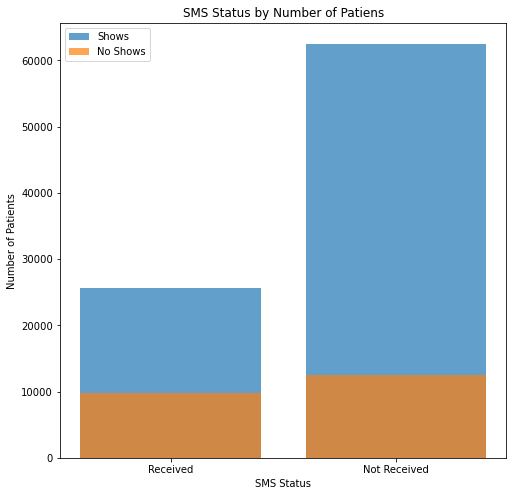

In [193]:
plot_bar(df, "sms_received == 1", "sms_received == 0", ['Received', 'Not Received'], 'SMS Status', 'Number of Patients',
        "SMS Status by Number of Patiens")

Surprising result. It looks like patients who didn't receive an SMS showed up more. Let's take a look at the numbers.

In [196]:
#create maasks for SMS Status for shows and no shows
sms_count = df.sms_received.value_counts()
sms_count_no_show = df_no_show.sms_received.value_counts()
print('SMS Not Received No Show %:', sms_count_no_show[0]/sms_count[0]*100)
print('SMS Received No Show %:', sms_count_no_show[1]/sms_count[1]*100)

SMS Not Received No Show %: 16.703533926762965
SMS Received No Show %: 27.574544839637


The numbers confirm our suspesion. Patients who received an SMS were more likely to not show by about 11%

The analysis showed that certain variables affect the probablity of patients showing up to their appointment. 5 Variables were analyzed: Gender, Age, Neighborhood, Scholarship Enrollment and SMS Status. 
The results of the analysis were as follows:
- Gender does not play a significant role .
- Age slightly affects the probability of showing, especially ages from 0-10 and 40-60 as they are more likely to show. However more advanced anaylsis needs to be done to confirm if there's any correlation.
- Certain neighbourhoods have higher probability than others.
- Patients enrolled in a scholarship are more likely to not show by about 4%
- Patients who received an SMS were more likely to not show by about 11%
Limitations:
- The analysis was done by regarding only 2 variables at most.
- No analysis was done regarding conditions such as chronics diseases.
- Days of the week were not analyzed since the data might be compromised.

<a id='conclusions'></a>
## Conclusions

The analysis showed that certain variables affect the probablity of patients showing up to their appointment. 5 Variables were analyzed: Gender, Age, Neighborhood, Scholarship Enrollment and SMS Status. 
The results of the analysis were as follows:
- Gender does not play a significant role .
- Age slightly affects the probability of showing, especially ages from 0-10 and 40-60 as they are more likely to show. However more advanced anaylsis needs to be done to confirm if there's any correlation.
- Certain neighbourhoods have higher probability than others.
- Patients enrolled in a scholarship are more likely to not show by about 4%
- Patients who received an SMS were more likely to not show by about 11%

### Limitations:

- The analysis was done by regarding only 2 variables at most.
- No analysis was done regarding conditions such as chronics diseases.
- Days of the week were not analyzed since the data might be compromised.

Further research could be done to explore other variables such as chronics conditions and appointment dates, as well as considering several variables together at a time, such as age and gender.